In [19]:
import os
import sys
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from scipy.stats import ks_2samp

Populating the interactive namespace from numpy and matplotlib


In [145]:
random_seed = 61194

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_seed)

cancer_dir = 'stat_dataset_cancer/values'
fibro_dir = 'stat_dataset_fibro/values'

cancer_ids = sorted(os.listdir(cancer_dir))
fibro_ids = sorted(os.listdir(fibro_dir))

cancer_list = np.array([os.path.join(cancer_dir, x) for x in cancer_ids])
fibro_list = np.array([os.path.join(fibro_dir, x) for x in fibro_ids])

X = np.concatenate((cancer_list, fibro_list), axis=0)
y = np.concatenate((np.zeros(cancer_list.shape[0]), np.ones(fibro_list.shape[0])), axis=0)


In [146]:
kit = 0
for train_index, test_index in kfold.split(X, y):
    kit += 1    
        
    X_train, y_train = X[train_index], y[train_index]    
    X_test, y_test = X[test_index], y[test_index]
    
    train_canpaths = X_train[y_train == 0]
    train_fibpaths = X_train[y_train == 1]
    
    train_canvals = []
    for fc in train_canpaths:
        with open(fc) as o:
            a = [float(x.split(',')[0]) for x in o.read().split()]
        train_canvals = train_canvals + a
    train_canvals = np.array(train_canvals)
        
    train_fibvals = []
    for ff in train_fibpaths:
        with open(ff) as o:
            a = [float(x.split(',')[0]) for x in o.read().split()]
        train_fibvals = train_fibvals + a
    train_fibvals = np.array(train_fibvals)
    
    y_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        with open(X_test[i]) as o:
            a = [float(x.split(',')[0]) for x in o.read().split()]
        vals = np.array(a)
        
        ks_can = ks_2samp(train_canvals, vals)
        ks_fib = ks_2samp(train_fibvals, vals)
        
        d_can, p_can = ks_can[0], ks_can[1]
        d_fib, p_fib = ks_fib[0], ks_fib[1]
        if abs(p_can - p_fib) < 0.01:
            if d_can < d_fib:
                answer = 0
            else:
                answer = 1
        else:
            if p_can > p_fib:
                answer = 0
            else:
                answer = 1
                
        y_pred[i] = answer
    
    print(kit)
    
    can = y_pred[y_test == 0]
    print(int(can.shape[0] - np.sum(can)), '/', can.shape[0])

    fib = y_pred[y_test == 1]
    print(int(np.sum(fib)), '/', fib.shape[0])

1
16 / 23
8 / 11
2
17 / 23
9 / 11
3
14 / 22
9 / 11


In [174]:
def grand_cross(random_seed=61194):    

    kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=random_seed)

    cancer_dir = 'stat_dataset_cancer/values'
    fibro_dir = 'stat_dataset_fibro/values'

    cancer_ids = sorted(os.listdir(cancer_dir))
    fibro_ids = sorted(os.listdir(fibro_dir))

    cancer_list = np.array([os.path.join(cancer_dir, x) for x in cancer_ids])
    fibro_list = np.array([os.path.join(fibro_dir, x) for x in fibro_ids])

    X = np.concatenate((cancer_list, fibro_list), axis=0)
    y = np.concatenate((np.zeros(cancer_list.shape[0]), np.ones(fibro_list.shape[0])), axis=0)

    
    sensitivity = []
    specificity = []
    accuracy = []
    for train_index, test_index in kfold.split(X, y):    
        
        X_train, y_train = X[train_index], y[train_index]    
        X_test, y_test = X[test_index], y[test_index]
    
        train_canpaths = X_train[y_train == 0]
        train_fibpaths = X_train[y_train == 1]
    
        train_canvals = []
        for fc in train_canpaths:
            with open(fc) as o:
                a = [float(x.split(',')[0]) for x in o.read().split()]
            train_canvals = train_canvals + a
        train_canvals = np.array(train_canvals)
        
        train_fibvals = []
        for ff in train_fibpaths:
            with open(ff) as o:
                a = [float(x.split(',')[0]) for x in o.read().split()]
            train_fibvals = train_fibvals + a
        train_fibvals = np.array(train_fibvals)
        
        y_pred = np.zeros(X_test.shape[0])
        for i in range(X_test.shape[0]):
            with open(X_test[i]) as o:
                a = [float(x.split(',')[0]) for x in o.read().split()]
            vals = np.array(a)
            
            ks_can = ks_2samp(train_canvals, vals)
            ks_fib = ks_2samp(train_fibvals, vals)
        
            d_can, p_can = ks_can[0], ks_can[1]
            d_fib, p_fib = ks_fib[0], ks_fib[1]
            if abs(p_can - p_fib) < 0.01:
                if d_can < d_fib:
                    answer = 0
                else:
                    answer = 1
            else:
                if p_can > p_fib:
                    answer = 0
                else:
                    answer = 1
                
            y_pred[i] = answer
            
        can = y_pred[y_test == 0]
        sensitivity.append((can.shape[0] - np.sum(can)) / can.shape[0])
    
        fib = y_pred[y_test == 1]
        specificity.append((np.sum(fib)) / fib.shape[0])
        
        accuracy.append((can.shape[0] - np.sum(can) + np.sum(fib)) / (can.shape[0] + fib.shape[0]))
    
    sensitivity = np.array(sensitivity)
    specificity = np.array(specificity)
    accuracy = np.array(accuracy
                       )
    return sensitivity, specificity, accuracy

In [176]:
seed_list = [61194, 190396]
#seed_list = range(61194 - 2, 61194 + 2)

sensitivity = np.array([])
specificity = np.array([])
accuracy = np.array([])

for seed in seed_list:
    sens, spec, accu = grand_cross(seed)
    print(sens, spec, accu)
    
    sensitivity = np.concatenate((sensitivity, sens), axis=0)
    specificity = np.concatenate((specificity, spec), axis=0)
    accuracy = np.concatenate((accuracy, accu), axis=0)
    
print(np.mean(sensitivity), np.mean(specificity), np.mean(accuracy))

[ 0.70588235  0.70588235] [ 0.70588235  0.875     ] [ 0.70588235  0.76      ]
[ 0.61764706  0.82352941] [ 0.76470588  0.8125    ] [ 0.66666667  0.82      ]
0.713235294118 0.789522058824 0.738137254902


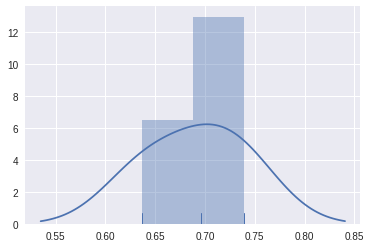

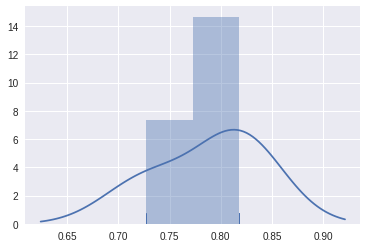

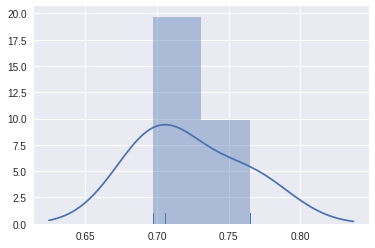

In [172]:
figure(figsize=(8, 6))

fig1 = plt.figure()
sns.distplot(sensitivity, rug=True, kde=True)

fig2 = plt.figure()
sns.distplot(specificity, rug=True, kde=True)

fig3 = plt.figure()
sns.distplot(accuracy, rug=True, kde=True)